In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pylab as plt

In [3]:
#housing_df = pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/BostonHousing.csv')

In [12]:
housing_df = housing_df.rename(columns={"CAT. MEDV": "CAT_MEDV"})
housing_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0


In [13]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


Description of Variables in the Boston Housing Dataset
CRIM Crime rate
ZN Percentage of residential land zoned for lots over 25,000 ft2
INDUS Percentage of land occupied by nonretail business
CHAS Does tract bound Charles River? (= 1 if tract bounds river, = 0 otherwise)
NOX Nitric oxide concentration (parts per 10 million)
RM Average number of rooms per dwelling
AGE Percentage of owner-occupied units built prior to 1940
DIS Weighted distances to five Boston employment centers
RAD Index of accessibility to radial highways
TAX Full-value property tax rate per $10,000
PTRATIO Pupil-to-teacher ratio by town
LSTAT Percentage of lower status of the population
MEDV Median value of owner-occupied homes in $1000s
CAT.MEDV Is median value of owner-occupied homes in tract above $30,000
(CAT.MEDV = 1) or not (CAT.MEDV = 0)?

## Basic Charts: Bar Charts, Line Graphs, and Scatter Plots

This is useful in the early stages of getting familiar with the data structure, the amount
and types of variables, the volume and type of missing values, etc.
The nature of the data mining task and domain knowledge about the data will affect plotting decision.
In supervised learning, there will be more focus on the outcome variable. 
In scatter plots, the outcome variable is typically associated with the y-axis. 
In unsupervised learning (for the purpose of data reduction or clustering), basic plots that convey
relationships (such as scatter plots) are preferred.

#### SCATTER PLOTS

Displays a scatter plot of MEDV vs. LSTAT. This is an important plot in the prediction task.
Note that the output MEDV is again on the y-axis (and LSTAT on the xaxis is a potential predictor). 
Variables in a basic scatter plot must be numerical..cannot be used to display the relation between CAT.MEDV and potential
predictors for the classification task.
For unsupervised learning, this particular scatter plot helps study the association between
two numerical variables in terms of information overlap as well as identifying clusters of observations.

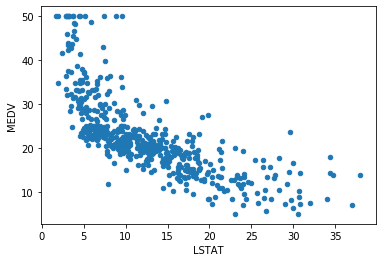

In [14]:
## scatter plot with axes names
housing_df.plot.scatter(x="LSTAT", y="MEDV")

#### BAR CHARTS

Bar charts for comparing a single statistic (e.g., average,percentage)across groups. 

The height of the bar (or length in a horizontal display) represents the
value of the statistic, and different bars correspond to different groups. 

Bar charts below--a numerical variable (MEDV) and for a categorical variable (CAT.MEDV). 
In each,separate bars are used to denote homes in Boston that are near the Charles River vs.
those that are not (thereby comparing the two categories of CHAS). 

The chart with the numerical output MEDV uses the average MEDV on the y-axis. This
supports the predictive task: the numerical outcome is on the y-axis and the x-axis is used
for a potential categorical predictor.
For the classification task, the y-axis indicates the percent of tracts with median value above $30K and 
the x-axis is a binary variable indicating proximity to the Charles. 

This plot shows us that the tracts bordering the Charles are much more likely to have median values above $30K.

In [ ]:
## barchart of CHAS vs. mean MEDV

In [7]:
ax = housing_df.groupby("CHAS").mean()
ax

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
CHAS,,,,,,,,,,,,,
0,3.744447,11.634820,11.019193,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,12.757941,22.093843,0.154989
1,1.851670,7.714286,12.719143,0.593426,6.519600,77.500000,3.029709,9.314286,386.257143,17.491429,11.241714,28.440000,0.314286


In [8]:
ax = housing_df.groupby("CHAS").mean().MEDV
ax

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

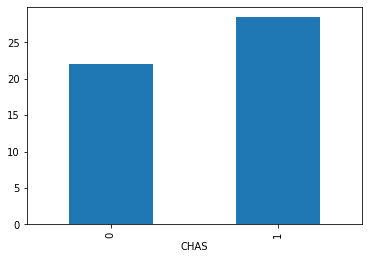

In [6]:
ax = housing_df.groupby("CHAS").mean().MEDV.plot(kind="bar")

Text(0, 0.5, 'Avg. MEDV')

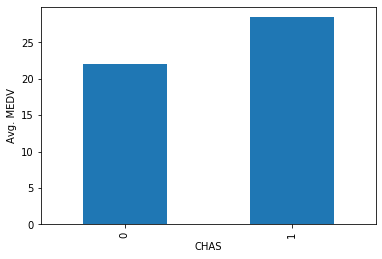

In [9]:
## barchart of CHAS vs. mean MEDV
# compute mean MEDV per CHAS = (0, 1)
ax = housing_df.groupby("CHAS").mean().MEDV.plot(kind="bar")
ax.set_ylabel("Avg. MEDV")

#### BOX PLOT & HISTOGRAM

Two plots that display the entire distribution of a numerical variable. 

Although averages are very popular and useful summary statistics, there is usually much to be
gained by looking at additional statistics such as the median and standard deviation of a
variable, and even more so by examining the entire distribution.

Whereas bar charts can only use a single aggregation, boxplots and histograms display the entire distribution of a
numerical variable. 

Boxplots are also effective for comparing subgroups by generating side-by-side boxplots, or
for looking at distributions over time by creating a series of boxplots.

Distribution plots are useful in supervised learning for determining potential data mining
methods and variable transformations. 

For example, skewed numerical variables might warrant transformation (e.g., moving to a logarithmic scale) 
if used in methods that assume normality (e.g., linear regression, discriminant analysis).

A histogram represents the frequencies of all x values with a series of vertical connected
bars. 

Fig below, there are over 150 tracts where the median value (MEDV) is between $20K and $25K.
Figure

Text(0, 0.5, 'count')

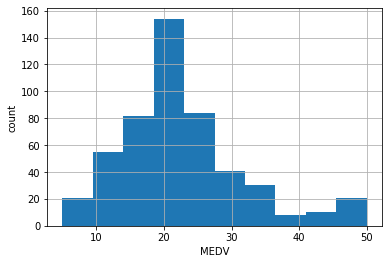

In [24]:
## histogram of MEDV
ax = housing_df.MEDV.hist()
ax.set_xlabel("MEDV"); ax.set_ylabel("count")

#### BOX PLOTS

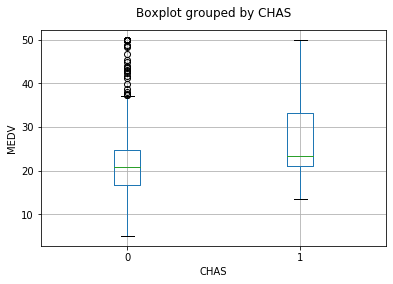

In [47]:
## boxplot of MEDV for different values of CHAS
ax = housing_df.boxplot(column="MEDV", by="CHAS")
ax.set_ylabel("MEDV")
plt.title("");

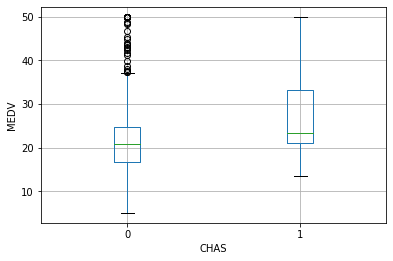

In [21]:
## Suppress titles
#boxplot of MEDV for different values of CHAS
ax = housing_df.boxplot(column="MEDV", by="CHAS")
ax.set_ylabel("MEDV")
plt.suptitle("") # Suppress the titles
plt.title("");

This plot shows us that the tracts bordering the Charles are much more likely to have median values above $30K.

#### side-by-side boxplots

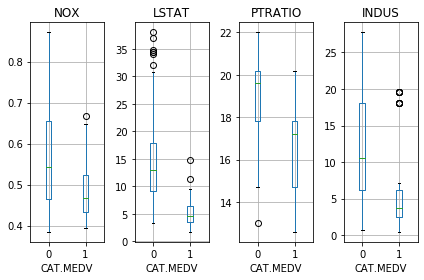

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column="NOX", by="CAT_MEDV", ax=axes[0])
housing_df.boxplot(column="LSTAT", by="CAT_MEDV", ax=axes[1])
housing_df.boxplot(column="PTRATIO", by="CAT_MEDV", ax=axes[2])
housing_df.boxplot(column="INDUS", by="CAT_MEDV", ax=axes[3])
for ax in axes:
    ax.set_xlabel("CAT.MEDV")
plt.suptitle("") # Suppress the overall title
plt.tight_layout() # Increase the separation between the plots

1.Because histograms and boxplots are geared toward numerical variables, their basic form
is useful for prediction tasks. 

2.Boxplots can also support unsupervised learning by displaying relationships between a numerical variable (y-axis) 
and a categorical variable (x-axis). To illustrate this Fig above shows a histogram of MEDV, revealing a skewed distribution( +ve). 

3.Transforming the output variable to log(MEDV) might improve results of a linear regression predictor.

4.Side-by-side boxplots compare the distribution of MEDV for homes that border the Charles River (1) or not (0)
Average MEDV for river-bounding homes is higher than the non-river-bounding homes,also,
the entire distribution is higher (median, quartiles, min, and max). 

5.Note all river-bounding homes have MEDV above $10K, unlike non-river-boundinghomes. 
This information is useful for identifying the potential importance of this
predictor (CHAS)

6.Boxplots and histograms applied to numerical variables can also provide directions for
deriving new variables, for example, they can indicate how to bin a numerical variable
(e.g., binning a numerical outcome in order to use a naive Bayes classifier, or in the
Boston Housing example, choosing the cutoff to convert MEDV to CAT.MEDV).

7.Finally, side-by-side boxplots are useful in classification tasks for evaluating the potential
of numerical predictors. This is done by using the x-axis for the categorical outcome and
the y-axis for a numerical predictor. Ex fig show the effects of four numerical predictors on CAT.MEDV. 

8.The pairs that are most separated (e.g., PTRATIO and INDUS) indicate potentially useful predictors.

9.The main weakness of basic charts and distribution plots, in their basic form (i.e., using
position in relation to the axes to encode values), is that they can only display two
variables and therefore cannot reveal high-dimensional information. 

10.Each of the basic charts has two dimensions, where each dimension is dedicated to a single variable. In
data mining, the data are usually multivariate by nature, and the analytics are designed to
capture and measure multivariate information. 

11.Visual exploration should therefore also incorporate this important aspect. 

12.So extend basic charts (and distribution plots) to multidimensional data visualization by adding features,
employing manipulations, and incorporating interactivity.

13.Several specialized charts are geared toward displaying special data structures

#### line graph

Example 2: Ridership on Amtrak Trains
Amtrak, a US railway company, routinely collects data on ridership. Here, we focus on
forecasting future ridership using the series of monthly ridership between January 1991
and March 2004. The data and their source are described in Chapter 16. Hence, our task
here is (numerical) time series forecasting.

Display a line chart for the time series of monthly railway passengers on Amtrak. 
Line graphs are used primarily for showing time series. The choice of time frame
to plot, as well as the temporal scale, should depend on the horizon of the forecasting task
and on the nature of the data.

In [7]:
## Load the Amtrak data and convert them to be suitable for time series analysis

In [48]:
Amtrak_df = pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/Amtrak.csv')

In [49]:
Amtrak_df.head(3)

,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715


In [50]:
Amtrak_df["Date"] = pd.to_datetime(Amtrak_df.Month)

In [51]:
Amtrak_df.head(3)

,Month,Ridership,Date
0,01/01/1991,1708.917,1991-01-01
1,01/02/1991,1620.586,1991-01-02
2,01/03/1991,1972.715,1991-01-03


In [52]:
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date)

Text(0, 0.5, 'Ridership (in 000s)')

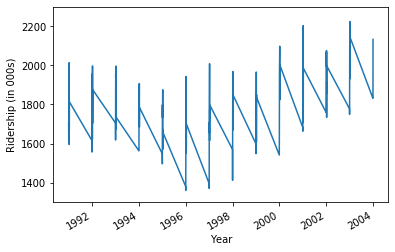

In [27]:
ridership_ts.plot(ylim=[1300, 2300], legend=False)
plt.xlabel("Year") # set x-axis label
plt.ylabel("Ridership (in 000s)") # set y-axis label

### CORRELATION INFORMATION

Correlation matrix summarizes relationships between two or more variables. 

For numerical variables,computes a complete matrix of correlations between each pair of
variables, using the pandas method corr().

Note that most correlations are low and that many are negative. (See visual display of a correlation matrix via a heatmap).

In [34]:
bostonHousing_df.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


### HEAT MAPS

Heatmaps: Visualizing Correlations and Missing Values
A heatmap is a graphical display of numerical data where color is used to denote values.
In a data mining context, heatmaps are especially useful for two purposes: for visualizing
correlation tables and for visualizing missing values in the data.

In both cases, the information is conveyed in a two-dimensional table. 
A correlation table for p variables has p rows and p columns. 

A data table contains p columns (variables) and n rows (observations). 
If the number of rows is huge, then a subset can be used. 

In both cases, it is much easier and faster to scan the color-coding rather than the values. 

NB: heatmaps are useful when examining a large number of values, but they are not a
replacement for more precise graphical display, such as bar charts, because color
differences cannot be perceived accurately.

In [35]:
## simple heatmap of correlations (without values)
corr = bostonHousing_df.corr()

In [71]:
import seaborn as sns

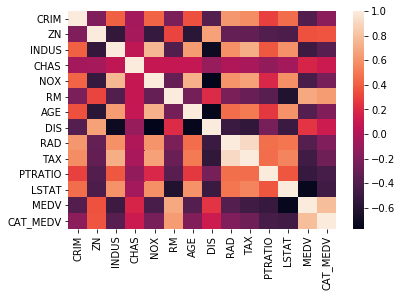

In [37]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)